# Introducción a Deep Learning

En este taller se dará una introducción a cómo funcionan las redes neuronales. Utilizaremos TFLearn, una librería que hace fácil manipular redes neuronales utilizando Tensorflow.


In [7]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


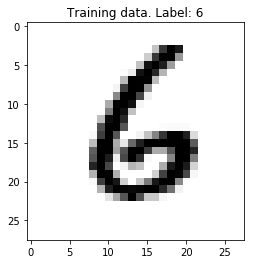

In [13]:
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Función para mostrar una imagen dado el índice en MNIST
def show_digit(index):
    label = trainY[index].argmax(axis=0)
    image = trainX[index].reshape([28,28])
    plt.title('Training data. Label: {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Mostrar la imagen número mil de MNIST
show_digit(1000)

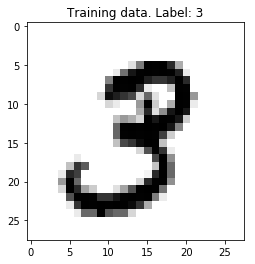

In [14]:
show_digit(1)

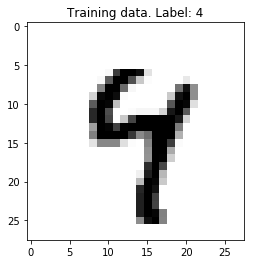

In [15]:
show_digit(2)

In [17]:
def build_model():
    input_layer = tflearn.input_data(shape=[None, 784])
    dense1 = tflearn.fully_connected(input_layer, 64, activation='tanh',
                                     regularizer='L2', weight_decay=0.001)
    dropout1 = tflearn.dropout(dense1, 0.8)
    dense2 = tflearn.fully_connected(dropout1, 64, activation='tanh',
                                     regularizer='L2', weight_decay=0.001)
    dropout2 = tflearn.dropout(dense2, 0.8)
    softmax = tflearn.fully_connected(dropout2, 10, activation='softmax')

    # Regression using SGD with learning rate decay and Top-3 accuracy
    sgd = tflearn.SGD(learning_rate=0.1, lr_decay=0.96, decay_step=1000)
    top_k = tflearn.metrics.Top_k(3)
    net = tflearn.regression(softmax, optimizer=sgd, metric=top_k,
                             loss='categorical_crossentropy')

    # Training
    model = tflearn.DNN(net, tensorboard_verbose=0)
    return model

In [18]:
model = build_model()
model.fit(trainX, trainY, n_epoch=20, validation_set=(testX, testY),
          show_metric=True, run_id="dense_model")

Training Step: 17199  | total loss: 0.13062 | time: 5.234s
| SGD | epoch: 020 | loss: 0.13062 - top3: 0.9951 -- iter: 54976/55000
Training Step: 17200  | total loss: 0.13160 | time: 6.374s
| SGD | epoch: 020 | loss: 0.13160 - top3: 0.9956 | val_loss: 0.11143 - val_acc: 0.9946 -- iter: 55000/55000
--


In [19]:
# Training
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=20)

Training Step: 27099  | total loss: 0.42212 | time: 3.210s
| SGD | epoch: 040 | loss: 0.42212 - top3: 0.9747 -- iter: 49400/49500
Training Step: 27100  | total loss: 0.38955 | time: 4.234s
| SGD | epoch: 040 | loss: 0.38955 - top3: 0.9772 | val_loss: 0.09226 - val_acc: 0.9971 -- iter: 49500/49500
--


In [20]:
predictions = np.array(model.predict(testX)).argmax(axis=1)
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)
print("Test accuracy: ", test_accuracy)


Test accuracy:  0.9689
